https://docs.google.com/document/d/1qJaeuC4Fddou_Ts2Lea0UHjrzgy8aSzY6ACCvUwuTe4/edit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
all = pd.read_csv('all.csv')

In [4]:
df = all.rename(columns={'Country Name' : 'country', 'Time' : 'time', 'GDP (current US$) [NY.GDP.MKTP.CD]' : 'gdp', 'CO2 emissions (kt) [EN.ATM.CO2E.KT]' : 'co2'})
df = df.replace('..', np.nan).dropna()

#cols = ['gdp', 'co2']
#for col in cols:
#    df[col] = pd.to_numeric(df[col])

In [5]:
df.head(3)

,country,Country Code,time,Time Code,gdp,co2
0,Afghanistan,AFG,2003.0,YR2003,4520946849.32079,1653.207
1,Afghanistan,AFG,2004.0,YR2004,5224896718.67782,1292.307
2,Afghanistan,AFG,2005.0,YR2005,6203256497.09044,1961.711


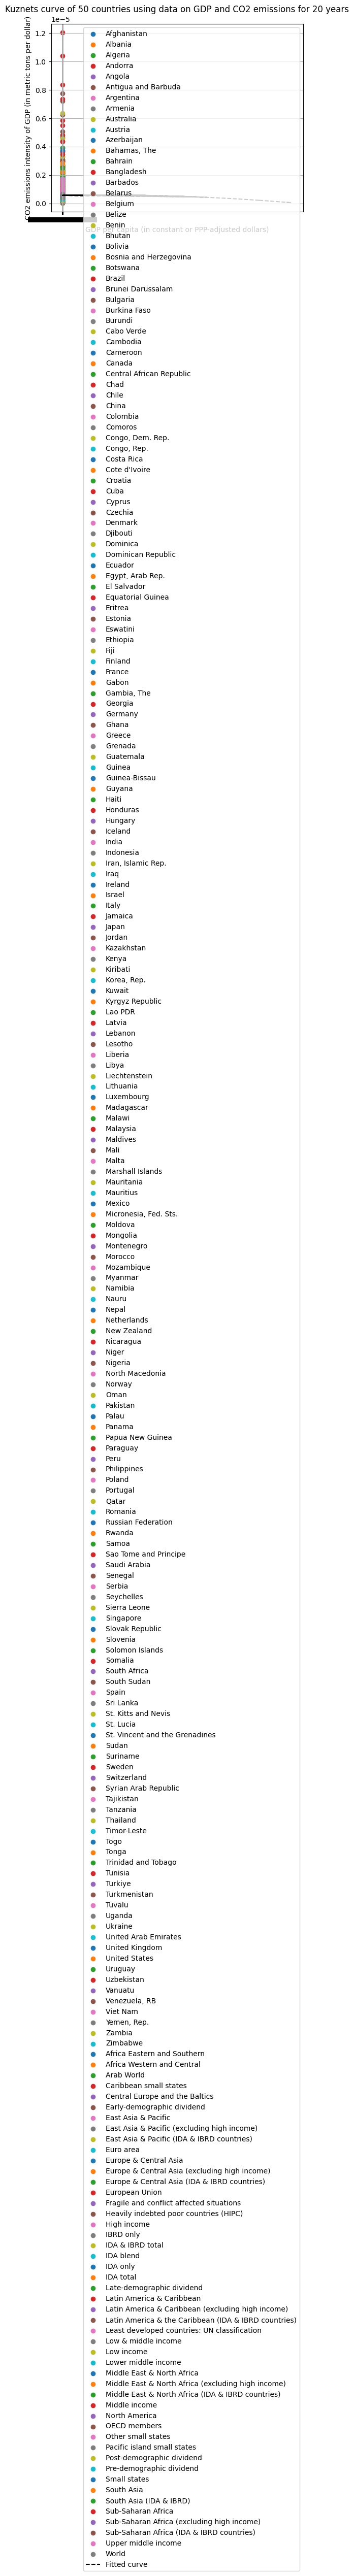

In [6]:
# Calculate the CO2 emissions intensity of GDP
df["intensity"] = df["co2"].astype(float) / df["gdp"].astype(float)

# Plot the data for each country and year
# You can change the colors and markers as needed
for country in df["country"].unique():
    plt.scatter(df[df["country"] == country]["gdp"], df[df["country"] == country]["intensity"], label=country)

# Fit a curve to the data using numpy.polyfit
# You can change the degree of the polynomial as needed
# Convert the "gdp" column to float
x = df["gdp"].astype(float) + 0.0
y = df["intensity"]
p = np.polyfit(x, y, 2)
f = np.poly1d(p)
plt.plot(x, f(x), "k--", label="Fitted curve")

# Add labels, title, legend, and grid
plt.xlabel("GDP per capita (in constant or PPP-adjusted dollars)")
plt.ylabel("CO2 emissions intensity of GDP (in metric tons per dollar)")
plt.title("Kuznets curve of 50 countries using data on GDP and CO2 emissions for 20 years")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [4]:
esg = pd.read_csv('esg.csv')
co2 = pd.read_csv('co2_metric_tons_per_capita.csv')
gdp = pd.read_csv('gdp_per_capita.csv')
cul = pd.read_csv('culture.csv')

In [5]:
cul_df.head(5)

,source:,Kaasa Minkov 2022,Kaasa Minkov 2022.1,Inglehart Welzel 2021,Inglehart Welzel 2021.1,Minkov Kaasa 2022,Minkov Kaasa 2022.1,Beugelsdijk Welzel 2018,Beugelsdijk Welzel 2018.1
0,country,freedom (vs concern),responsibility (vs faith),self-expression (vs survival),secular (vs traditional),individualism (vs collectivism),flexibility (vs monumentalism),individualism (vs collectivism),duty (vs joy)
1,Albania,-0.49,-0.26,-0.86,-0.25,-91,38,34.2,0
2,Algeria,-0.42,-0.95,-0.87,-0.81,-83,-95,9.8,-43.2
3,Andorra,1.85,0.32,2.00,0.72,108,-8,92.3,-89.4
4,Argentina,0.68,-0.48,0.34,-0.46,-5,-80,36.2,-66


In [ ]:
df['gdp_squared'] = df['gdp']**2
formula = 'co2 ~ gdp + gdp_squared'
model = smf.ols(formula, data=df)
ols = model.fit()

print(ols.summary())